In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
# matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus']=False

In [2]:
# read data manually
def parse_unroll_file(filepath):
    unroll_list = []
    compile_time = []
    exe_time = []
    want_to_show = [1, 10, 20, 50, 100]
    with open(filepath,'r') as file:
        next(file)  # 跳过第一行
        lines = file.readlines()
        for line in lines:
            metrics = line.split(',')
            if len(metrics) != 3:
                print("file should have 4 columns")
                exit()
            unroll = int(metrics[0].strip())
            # make sure unroll is divisible
            if unroll in want_to_show:
                unroll_list.append(unroll)
                compile_time.append(float(metrics[1].strip()))
                exe_time.append(float(metrics[2].strip()))

    
    return unroll_list, compile_time, exe_time

v100_unroll, v100_compile_time, v100_exe_time = parse_unroll_file("../data/mlp_tesla.csv")
titan_unroll, titan_compile_time, titan_exe_time = parse_unroll_file("../data/mlp_titan.csv")
print(v100_unroll)
print(titan_compile_time)

[1, 10, 20, 50, 100]
[2.6307990550994873, 7.55957293510437, 15.213261604309082, 41.15185594558716, 127.54430794715881]


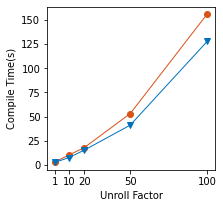

In [5]:
# (5, 3): control the figure size
fig, ax = plt.subplots(figsize=(3, 3))

# v100_unroll: x axis
# v100_compile_time: y axis
# 'o-': circle datapoint with line, 'v-': triangle datapoint with line
# label: Labels for future legend ploting
ax.plot(v100_unroll, v100_compile_time, 'o-', color="#D95319", linewidth=1, label='V100')
ax.plot(titan_unroll, titan_compile_time, 'v-', color="#0072BD", linewidth=1, label='Titan')

# only show the ticks that in unroll list
# set_xticks is for the position or coordinates
# set_xticklabels is for the label name
ax.set_xticks(v100_unroll)
ax.set_xticklabels(v100_unroll)

ax.set_xlabel('Unroll Factor')
ax.set_ylabel('Compile Time(s)')

plt.savefig('../pics/mlp_cpt_jax.pdf', format='pdf', dpi=300, pad_inches = 0, bbox_inches='tight')
plt.show()

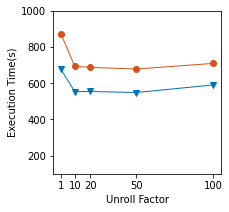

In [6]:
fig, ax = plt.subplots(figsize=(3, 3))

ax.plot(v100_unroll, v100_exe_time, 'o-', color="#D95319", linewidth=1, label='V100')
ax.plot(titan_unroll, titan_exe_time, 'v-', color="#0072BD", linewidth=1, label='Titan')

ax.set_xticks(v100_unroll)
ax.set_xticklabels(v100_unroll)

ax.set_xlabel('Unroll Factor')
ax.set_ylabel('Execution Time(s)')

ax.set_ylim(1e2, 1e3)
plt.savefig('../pics/mlp_ext_jax.pdf', format='pdf', dpi=300, pad_inches = 0, bbox_inches='tight')
plt.show()